In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import helper

In [87]:
# import ames_data_processing
%run -i '../final/ames_data_processing.py'

In [5]:
# loading and splitting data
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col = 0,
                      low_memory=False)

housing.drop_duplicates(inplace=True)
housing.reset_index(drop=True, inplace=True)

housing = housing[(housing['SaleCondition'] == 'Normal') | 
                   (housing['SaleCondition'] == 'Partial')].reset_index(drop=True)

train, test = helper.stratified_split(housing,'Neighborhood')

train = helper.data_processing_wrapper(train)
test = helper.data_processing_wrapper(test)

AttributeError: module 'helper' has no attribute 'data_processing_wrapper'

In [88]:
# log the output SalePrice in original dataframe
train['SalePrice'] = np.log(train['SalePrice'])

# isolate numeric variables
trainNumeric = train.loc[:, train.dtypes != 'object']

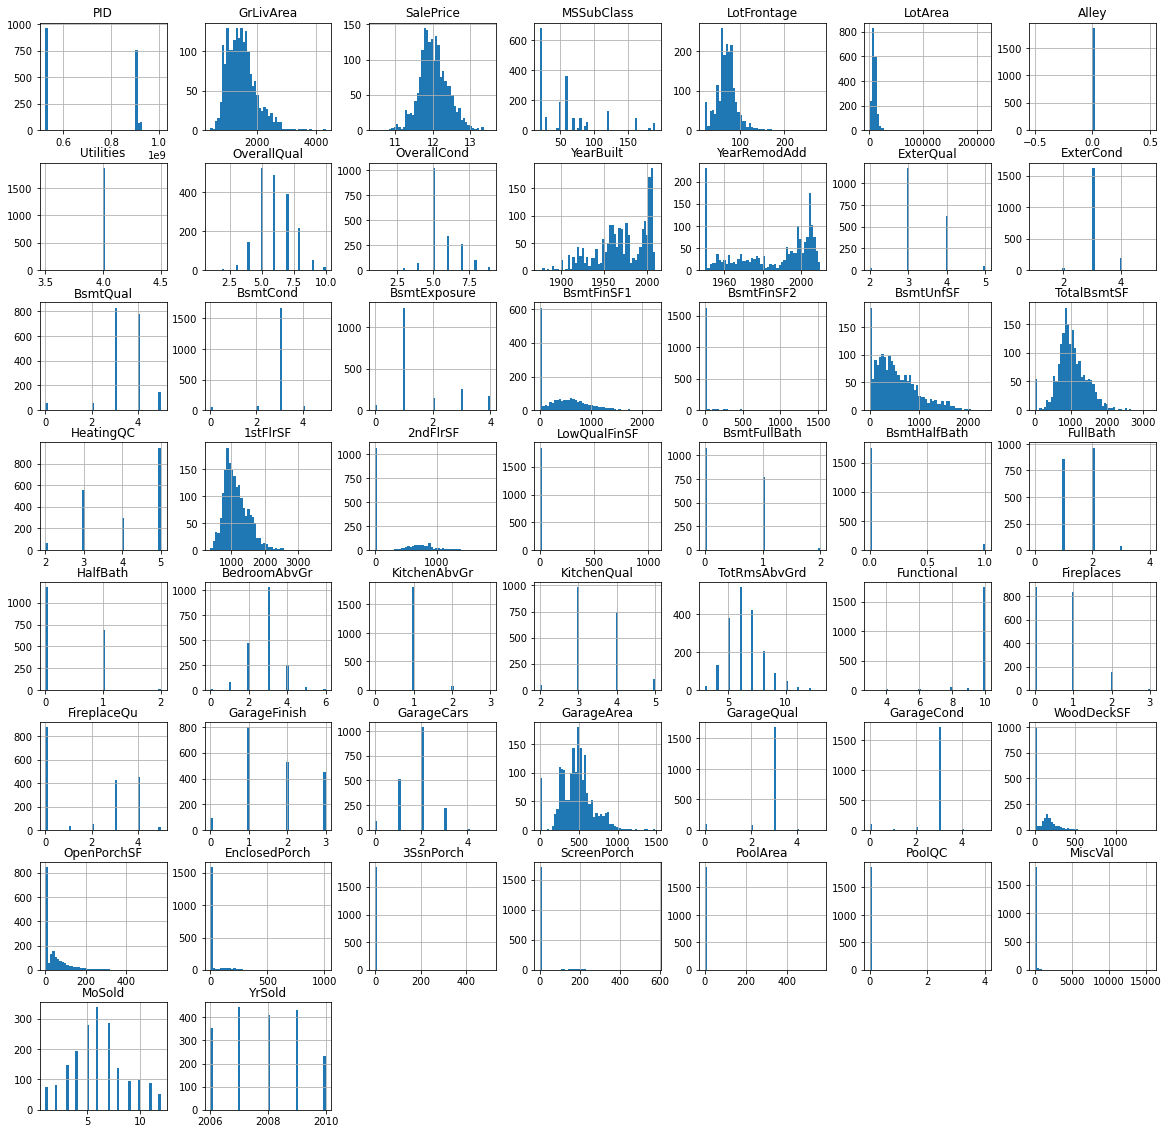

In [89]:
train.hist(bins=50, figsize=(20,20));

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

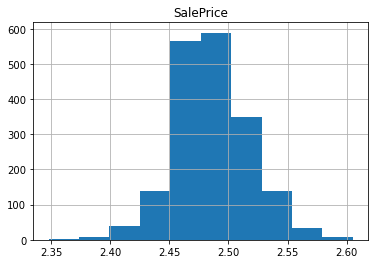

In [35]:
label = train[['SalePrice']]
label.hist()

In [50]:
# Correlation matrix - looking at SalePrice
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)
# corr_matrix.head()

# isolate top 10 quantitative
top10cols = corr_matrix['SalePrice'].sort_values(ascending=False).head(11)
top10cols = list(top10cols.index)

In [51]:
top10df = train[top10cols]

In [69]:
top10df.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea',
       'TotalBsmtSF', 'KitchenQual', '1stFlrSF', 'BsmtQual', 'YearBuilt'],
      dtype='object')

In [67]:
top10df = top10df.drop('SalePrice')

KeyError: "['SalePrice'] not found in axis"

In [57]:
from sklearn.linear_model import LinearRegression

In [59]:
label

,SalePrice
0,2.434277
1,2.470447
2,2.433297
3,2.461913
4,2.481368
...,...
1866,2.478640
1867,2.531920
1868,2.453266
1869,2.515744


In [70]:
lr = LinearRegression()
lr.fit(top10df, label)
lr.score(top10df, label)

0.873921499120946

In [78]:
label

,SalePrice
0,2.434277
1,2.470447
2,2.433297
3,2.461913
4,2.481368
...,...
1866,2.478640
1867,2.531920
1868,2.453266
1869,2.515744


In [80]:
lr.fit(top10df.iloc[:,:5], label)

LinearRegression()

In [76]:
lr.fit(top10df.iloc[:,:i], label)

ValueError: at least one array or dtype is required

In [81]:
score = []
for i in range(0,10):
    lr.fit(top10df.iloc[:,:i+1], label)
    sc = lr.score(top10df.iloc[:,:i+1], label)
    score.append(sc)
    
print(score)

[0.6809503490326954, 0.787957879539819, 0.8149109299563063, 0.8226650635580713, 0.8263876129694806, 0.854404000889205, 0.8587873260537464, 0.8593066642783429, 0.8643649363256027, 0.873921499120946]


In [98]:
lr.predict(test[top10cols].drop('SalePrice', axis=1))

ValueError: could not convert string to float: 'TA'

In [97]:
test[top10cols].drop('SalePrice', axis=1)

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,KitchenQual,1stFlrSF,BsmtQual,YearBuilt
0,7,1820,1.0,TA,240.0,1026.0,TA,1133,TA,1925
1,5,1296,1.0,TA,260.0,1107.0,Fa,1296,TA,1924
2,7,1434,2.0,Gd,527.0,1454.0,Gd,1434,Gd,2001
3,6,1499,2.0,Gd,473.0,781.0,Gd,795,Gd,1995
4,6,1797,2.0,Gd,616.0,1152.0,Gd,1152,Gd,1993
...,...,...,...,...,...,...,...,...,...,...
619,7,1501,2.0,Gd,512.0,1501.0,Gd,1501,Gd,1987
620,6,2087,2.0,TA,444.0,832.0,Gd,976,TA,1966
621,5,1160,1.0,TA,257.0,1113.0,Gd,1160,TA,1968
622,7,1865,3.0,Gd,839.0,992.0,Gd,992,Gd,2000


In [100]:
trainCopy = train.copy()

In [101]:
#### TEMPORARY - Just to clean the test data
train = test
# converting all similar mappings together
# most popular mapping
cat_ordinal_features = [
    'GarageQual','GarageCond',
    'FireplaceQu',
    'KitchenQual',
    'ExterQual','ExterCond',
    'BsmtQual','BsmtCond',
    'HeatingQC'
    ]
cat_ordinal_dict = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# now just unique mappings
# BsmtExposure
cat_ordinal_features = [
    'BsmtExposure'
]
cat_ordinal_dict = {'No':1,'Mn':2,'Av':3,'Gd':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
#(Niki) Updated values in mapping dictionary
# Functional
cat_ordinal_features = [
    'Functional'
]
cat_ordinal_dict = {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,
                    'Mod':6,'Min2':8,'Min1':9,'Typ':10}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# PoolQC ((Niki) Suggest Dropping in future and replace by _has_Pool binary feature)
cat_ordinal_features = [
    'PoolQC'
]
cat_ordinal_dict = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# (JH) Garage Finish
cat_ordinal_features = [
    'GarageFinish'
]
cat_ordinal_dict = {'Unf':1,'RFn':2,'Fin':3}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)

# (JH) Alley
cat_ordinal_features = [
    'Alley'
]
cat_ordinal_dict = {'Grvl':1,'Pave':2}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)

# (JH) PavedDrive
cat_ordinal_features = [
    'Alley'
]
cat_ordinal_dict = {'P':1,'Y':2}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)
# (AA) LotFrontage imputed as (coefficient from dict) * sqrt(LotArea)
LotFrontage_dict = {'1Fam':0.7139, 'TwnhsE':0.5849, 'Twnhs':0.5227, 'Duplex':0.7725, '2fmCon':0.6922}
train.loc[train['LotFrontage'].isna(), 'LotFrontage'] = train.loc[train['LotFrontage'].isna(), :].apply(
    lambda x: LotFrontage_dict[x['BldgType']]*np.sqrt(x['LotArea']), axis=1
)

# (Niki) Utilities
cat_ordinal_features = [
    'Utilities'
]
cat_ordinal_dict = {'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4}
train = helper.convert_cat_ordinal_vars_to_num(train,
                                               cat_ordinal_features,
                                               cat_ordinal_dict)


############################################################
# weirdest nas. lot frontage. probably worth removing
# not dealing with them out of expediance.
# (AA) Removing LotFrontage here because imputed above.
drop_now_but_look_at_later = ['MasVnrArea','GarageYrBlt']
train.drop(drop_now_but_look_at_later, axis=1,inplace = True)

# NAs that have meaning based on data dicitonary.
# nas are "None" categorical value
na_none_features = ['MiscFeature','BsmtFinType1','BsmtFinType2',
                   'GarageType', 'MasVnrType']
for na_none_feature in na_none_features:
    train[na_none_feature] = train[na_none_feature].fillna(value = 'None')

# nas are 0 numerical value
# (AA) Changed na_none_feature to na_zero_feature for readability. 
# (AA) Added 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF' to the list.
na_zero_features = ['BsmtFullBath','BsmtHalfBath','GarageFinish','Alley', 
                   'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for na_zero_feature in na_zero_features:
    train[na_zero_feature] = train[na_zero_feature].fillna(value = 0)
    
############################################################
# second group of features that have problems that I need help solving.
cols_na = train.loc[:,train.isna().any(axis=0)].columns.to_list()
cols_na

#############################################################
# (JH) Julie's specific additions
# (HW) Consider making this more generalizable
# 1. Replacing two values of GarageType to None

train.loc[train['PID'] == 903426160,'GarageType'] = 'None'
train.loc[train['PID'] == 910201180,'GarageType'] = 'None'

#####
# (Niki) Replace 'Pool Area' feature with binary '_has_Pool'. Drop PoolQC
#train['_has_Pool'] = [1 if row != 0 else 0 for row in train['PoolArea']]

# (Niki) Replace null value for Electrical with most common value 'SBrkr'
train['Electrical'] = train['Electrical'].fillna(value = 'SBrkr')

test = train

In [102]:
test.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,903401020,1820,184000,50,RL,60.0,9120,Pave,0.0,Reg,...,0,0,0.0,GdPrv,None,0,6,2008,WD,Normal
1,909100080,1296,104000,30,RL,67.0,4853,Pave,0.0,Reg,...,0,0,0.0,MnPrv,None,0,5,2010,WD,Normal
2,531385020,1434,189000,20,RL,65.0,8529,Pave,0.0,IR1,...,0,0,0.0,NaN,None,0,4,2009,WD,Normal
3,907130110,1499,187000,60,RL,65.0,12438,Pave,0.0,IR1,...,0,0,0.0,NaN,None,0,8,2006,WD,Normal
4,924152030,1797,231000,60,RL,74.0,12961,Pave,0.0,Reg,...,0,0,0.0,NaN,None,0,3,2010,WD,Normal


In [103]:
test[top10cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,KitchenQual,1stFlrSF,BsmtQual,YearBuilt
0,184000,7,1820,1.0,3,240.0,1026.0,3,1133,3.0,1925
1,104000,5,1296,1.0,3,260.0,1107.0,2,1296,3.0,1924
2,189000,7,1434,2.0,4,527.0,1454.0,4,1434,4.0,2001
3,187000,6,1499,2.0,4,473.0,781.0,4,795,4.0,1995
4,231000,6,1797,2.0,4,616.0,1152.0,4,1152,4.0,1993
...,...,...,...,...,...,...,...,...,...,...,...
619,244000,7,1501,2.0,4,512.0,1501.0,4,1501,4.0,1987
620,187500,6,2087,2.0,3,444.0,832.0,4,976,3.0,1966
621,152500,5,1160,1.0,3,257.0,1113.0,4,1160,3.0,1968
622,235000,7,1865,3.0,4,839.0,992.0,4,992,4.0,2000


<AxesSubplot:>

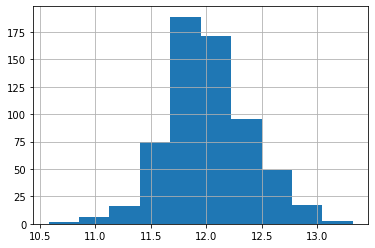

In [108]:
ylabel = np.log(test['SalePrice'])
ylabel.hist()

In [109]:
lr.predict(test[top10cols].drop('SalePrice', axis=1))

array([[2.48608346],
       [2.45895004],
       [2.50655155],
       [2.48893413],
       [2.50255816],
       [2.48496415],
       [2.46028906],
       [2.47477553],
       [2.5220245 ],
       [2.4826003 ],
       [2.46058531],
       [2.5119356 ],
       [2.50283727],
       [2.53333785],
       [2.54807492],
       [2.49798177],
       [2.56591815],
       [2.48138974],
       [2.4688314 ],
       [2.50712617],
       [2.47712648],
       [2.54497296],
       [2.51053757],
       [2.48671849],
       [2.44340943],
       [2.45016917],
       [2.47418062],
       [2.46181014],
       [2.50951549],
       [2.45244375],
       [2.43725749],
       [2.48738404],
       [2.50395354],
       [2.46042847],
       [2.53101143],
       [2.55845304],
       [2.46286825],
       [2.50369026],
       [2.47392264],
       [2.48164044],
       [2.47558064],
       [2.55427637],
       [2.45515897],
       [2.45623198],
       [2.47020007],
       [2.4591244 ],
       [2.48323044],
       [2.512

In [111]:
test[top10cols].columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
       'GarageArea', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF', 'BsmtQual',
       'YearBuilt'],
      dtype='object')

In [110]:
lr.score(test[top10cols].drop('SalePrice', axis=1), ylabel)

-638.3601105383157

In [113]:
top10df

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,KitchenQual,1stFlrSF,BsmtQual,YearBuilt
0,4,1296,2.0,3,516.0,0.0,3,1296,0.0,1967
1,6,1229,2.0,3,462.0,561.0,4,561,4.0,1980
2,6,948,1.0,3,264.0,483.0,3,483,3.0,1972
3,5,1040,2.0,3,624.0,528.0,3,548,3.0,1936
4,6,912,2.0,3,470.0,888.0,3,912,4.0,1978
...,...,...,...,...,...,...,...,...,...,...
1866,7,1200,2.0,4,480.0,600.0,4,600,4.0,2004
1867,8,2400,3.0,4,730.0,1082.0,4,1105,4.0,2003
1868,4,1346,1.0,3,384.0,560.0,3,796,2.0,1910
1869,8,2031,2.0,4,577.0,1128.0,4,1128,4.0,2002


In [126]:
score_x = []
score_y = []
for i in range(1,11):
    cols = top10cols[1:i+1]
    lr.fit(top10df.loc[cols], label)
    scx = lr.score(top10df.loc[cols], label)
    score_x.append(scx)
    scy = lr.score(test.loc[cols], labely)
    score_y.append(scy)
print(score)

KeyError: "None of [Index(['OverallQual'], dtype='object')] are in the [index]"

In [168]:
cols = top10cols[:9+1]
cols = cols[1:]
type(cols)

list

In [169]:
top10df[cols]

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,KitchenQual,1stFlrSF,BsmtQual
0,4,1296,2.0,3,516.0,0.0,3,1296,0.0
1,6,1229,2.0,3,462.0,561.0,4,561,4.0
2,6,948,1.0,3,264.0,483.0,3,483,3.0
3,5,1040,2.0,3,624.0,528.0,3,548,3.0
4,6,912,2.0,3,470.0,888.0,3,912,4.0
...,...,...,...,...,...,...,...,...,...
1866,7,1200,2.0,4,480.0,600.0,4,600,4.0
1867,8,2400,3.0,4,730.0,1082.0,4,1105,4.0
1868,4,1346,1.0,3,384.0,560.0,3,796,2.0
1869,8,2031,2.0,4,577.0,1128.0,4,1128,4.0


In [170]:
top10df.loc[:,cols]

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,KitchenQual,1stFlrSF,BsmtQual
0,4,1296,2.0,3,516.0,0.0,3,1296,0.0
1,6,1229,2.0,3,462.0,561.0,4,561,4.0
2,6,948,1.0,3,264.0,483.0,3,483,3.0
3,5,1040,2.0,3,624.0,528.0,3,548,3.0
4,6,912,2.0,3,470.0,888.0,3,912,4.0
...,...,...,...,...,...,...,...,...,...
1866,7,1200,2.0,4,480.0,600.0,4,600,4.0
1867,8,2400,3.0,4,730.0,1082.0,4,1105,4.0
1868,4,1346,1.0,3,384.0,560.0,3,796,2.0
1869,8,2031,2.0,4,577.0,1128.0,4,1128,4.0


In [157]:
top10df.head()

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,KitchenQual,1stFlrSF,BsmtQual,YearBuilt
0,4,1296,2.0,3,516.0,0.0,3,1296,0.0,1967
1,6,1229,2.0,3,462.0,561.0,4,561,4.0,1980
2,6,948,1.0,3,264.0,483.0,3,483,3.0,1972
3,5,1040,2.0,3,624.0,528.0,3,548,3.0,1936
4,6,912,2.0,3,470.0,888.0,3,912,4.0,1978
